In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import numpy as np

In [23]:
df = pd.read_csv('/content/Loan_default.csv')
print(df.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [3]:
# Drop specified columns
df = df.drop(columns=['LoanID','Age','MonthsEmployed',
                      'NumCreditLines', 'LoanTerm', 'Education',
                      'EmploymentType', 'MaritalStatus', 'HasMortgage',
                      'HasDependents', 'LoanPurpose', 'HasCoSigner'])

In [4]:
df.head()

,Income,LoanAmount,CreditScore,InterestRate,DTIRatio,Default
0,85994,50587,520,15.23,0.44,0
1,50432,124440,458,4.81,0.68,0
2,84208,129188,451,21.17,0.31,1
3,31713,44799,743,7.07,0.23,0
4,20437,9139,633,6.51,0.73,0


In [5]:
print(df.isnull().sum())

Income          0
LoanAmount      0
CreditScore     0
InterestRate    0
DTIRatio        0
Default         0
dtype: int64


In [6]:
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # For non-numeric columns, you might use mode
            df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())

Income          0
LoanAmount      0
CreditScore     0
InterestRate    0
DTIRatio        0
Default         0
dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [8]:
# Features and target
X = df.drop(columns='Default')
y = df['Default']

In [9]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Step 2: Polynomial Feature Transformation (degree 2 to capture non-linearity)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
# Lasso Model (L1 Penalty)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_poly, y_train)

Lasso(alpha=0.1)

In [25]:
# Ridge Model (L2 Penalty)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08088e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.1)

In [16]:
# Step 4: Model Evaluation
# Lasso Predictions
lasso_preds = lasso_model.predict(X_test_poly)
lasso_preds_class = [1 if pred > 0.5 else 0 for pred in lasso_preds]  # Convert to classification


In [17]:
# Ridge Predictions
ridge_preds = ridge_model.predict(X_test_poly)
ridge_preds_class = [1 if pred > 0.5 else 0 for pred in ridge_preds]  # Convert to classification

In [18]:
# Evaluate with metrics: Accuracy, MSE, R-squared

# Lasso Evaluation
lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_accuracy = accuracy_score(y_test, lasso_preds_class)
lasso_r2 = r2_score(y_test, lasso_preds)

# Ridge Evaluation
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_accuracy = accuracy_score(y_test, ridge_preds_class)
ridge_r2 = r2_score(y_test, ridge_preds)

In [19]:

# Print evaluation metrics
print(f'Lasso MSE: {lasso_mse}, Accuracy: {lasso_accuracy}, R2: {lasso_r2}')
print(f'Ridge MSE: {ridge_mse}, Accuracy: {ridge_accuracy}, R2: {ridge_r2}')

Lasso MSE: 0.09733212387143217, Accuracy: 0.8844722929312708, R2: 0.047454315780895207
Ridge MSE: 0.09725622306044476, Accuracy: 0.8844722929312708, R2: 0.04819712285279565


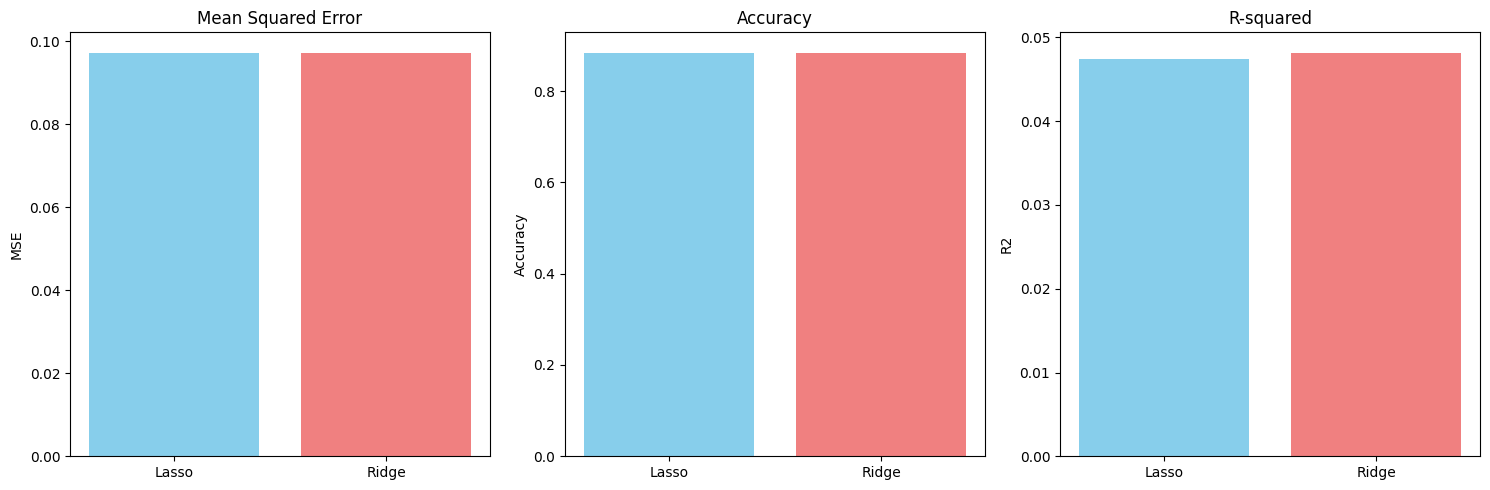

In [20]:
# prompt: plot the output

import matplotlib.pyplot as plt

# Data for plotting
models = ['Lasso', 'Ridge']
mse_scores = [lasso_mse, ridge_mse]
accuracy_scores = [lasso_accuracy, ridge_accuracy]
r2_scores = [lasso_r2, ridge_r2]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MSE
axes[0].bar(models, mse_scores, color=['skyblue', 'lightcoral'])
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')

# Plot Accuracy
axes[1].bar(models, accuracy_scores, color=['skyblue', 'lightcoral'])
axes[1].set_title('Accuracy')
axes[1].set_ylabel('Accuracy')

# Plot R-squared
axes[2].bar(models, r2_scores, color=['skyblue', 'lightcoral'])
axes[2].set_title('R-squared')
axes[2].set_ylabel('R2')

# Display the plot
plt.tight_layout()
plt.show()